<a href="https://colab.research.google.com/github/ritesh-CSE/Ritesh-resumee/blob/main/road_wear_and_dame_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn flask joblib


In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
rows = 2000

data = {
    "traffic_volume": np.random.randint(500, 5000, rows),
    "heavy_vehicle_pct": np.random.randint(5, 80, rows),
    "rainfall_mm": np.random.randint(100, 2000, rows),
    "road_age_years": np.random.randint(1, 20, rows),
    "maintenance_score": np.random.randint(1, 10, rows)
}

df = pd.DataFrame(data)

conditions = []
for i in range(rows):
    score = (
        df.loc[i, "traffic_volume"] * 0.3 +
        df.loc[i, "heavy_vehicle_pct"] * 2 +
        df.loc[i, "rainfall_mm"] * 0.2 +
        df.loc[i, "road_age_years"] * 10 -
        df.loc[i, "maintenance_score"] * 15
    )

    if score < 2000:
        conditions.append("Good")
    elif score < 3500:
        conditions.append("Moderate")
    else:
        conditions.append("Poor")

df["road_condition"] = conditions
df.to_csv("road_data.csv", index=False)

df.head()


,traffic_volume,heavy_vehicle_pct,rainfall_mm,road_age_years,maintenance_score,road_condition
0,1360,9,1041,17,2,Good
1,4272,9,929,13,6,Good
2,3592,12,1870,2,6,Good
3,966,68,618,13,8,Good
4,4926,14,1075,7,2,Good


In [3]:
df = pd.read_csv("road_data.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   traffic_volume     2000 non-null   int64 
 1   heavy_vehicle_pct  2000 non-null   int64 
 2   rainfall_mm        2000 non-null   int64 
 3   road_age_years     2000 non-null   int64 
 4   maintenance_score  2000 non-null   int64 
 5   road_condition     2000 non-null   object
dtypes: int64(5), object(1)
memory usage: 93.9+ KB


,traffic_volume,heavy_vehicle_pct,rainfall_mm,road_age_years,maintenance_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2786.209500,42.236500,1055.266000,10.079000,4.979000
std,1295.146799,21.312219,547.726563,5.548437,2.664791
min,501.000000,5.000000,100.000000,1.000000,1.000000
25%,1653.000000,24.000000,579.750000,5.000000,3.000000
50%,2833.000000,42.000000,1050.000000,10.000000,5.000000
75%,3887.500000,61.000000,1531.000000,15.000000,7.000000
max,4999.000000,79.000000,1998.000000,19.000000,9.000000


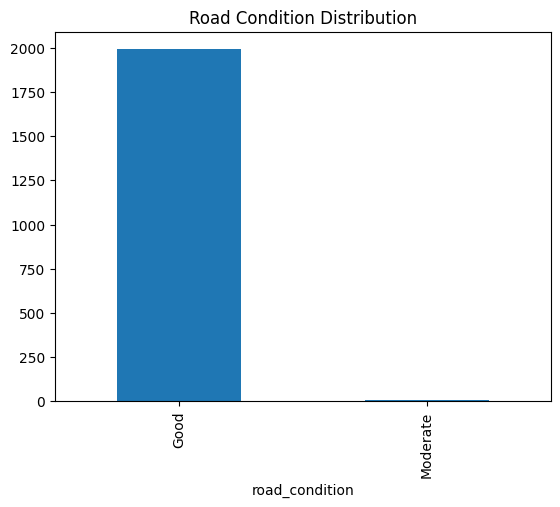

In [4]:
import matplotlib.pyplot as plt

df["road_condition"].value_counts().plot(kind="bar")
plt.title("Road Condition Distribution")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop("road_condition", axis=1)
y = df["road_condition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [7]:
import joblib
joblib.dump(model, "road_model.pkl")


['road_model.pkl']

In [9]:
import pandas as pd

sample_df = pd.DataFrame([{
    "traffic_volume": 3000,
    "heavy_vehicle_pct": 60,
    "rainfall_mm": 1200,
    "road_age_years": 12,
    "maintenance_score": 3
}])

prediction = model.predict(sample_df)
prediction



array(['Good'], dtype=object)

In [12]:
!pip install pyngrok



In [14]:
import pandas as pd
import joblib

model = joblib.load("road_model.pkl")

test_input = pd.DataFrame([{
    "traffic_volume": 3500,
    "heavy_vehicle_pct": 65,
    "rainfall_mm": 1600,
    "road_age_years": 14,
    "maintenance_score": 3
}])

model.predict(test_input)


array(['Good'], dtype=object)

In [15]:
!pip install gradio


In [16]:
import joblib
import pandas as pd

model = joblib.load("road_model.pkl")


In [17]:
def predict_road_condition(
    traffic_volume,
    heavy_vehicle_pct,
    rainfall_mm,
    road_age_years,
    maintenance_score
):
    input_df = pd.DataFrame([{
        "traffic_volume": traffic_volume,
        "heavy_vehicle_pct": heavy_vehicle_pct,
        "rainfall_mm": rainfall_mm,
        "road_age_years": road_age_years,
        "maintenance_score": maintenance_score
    }])

    prediction = model.predict(input_df)[0]
    return prediction


In [18]:
import gradio as gr

interface = gr.Interface(
    fn=predict_road_condition,
    inputs=[
        gr.Number(label="Traffic Volume (vehicles/day)"),
        gr.Number(label="Heavy Vehicle Percentage (%)"),
        gr.Number(label="Rainfall (mm/year)"),
        gr.Number(label="Road Age (years)"),
        gr.Number(label="Maintenance Score (1–10)")
    ],
    outputs=gr.Textbox(label="Predicted Road Condition"),
    title="Road Wear & Damage Prediction System",
    description="Enter road and environmental parameters to predict road condition using a Machine Learning model."
)


In [19]:
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b4ca8098949cdd9871.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
